In [2]:
using LaTeXStrings
using GaussianProcesses
using Distributions
using Base.LinAlg
using Distances
import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

In [78]:
srand(1)
n = 100
x1 = sort(randn(n)+0.7)
X = hcat(ones(n), x1)
xstar = randn(10,1)*5
β = reshape([1.2, 2.0], (2,1))
σ = 0.3
Y = vec(X*β) + randn(n) * σ

100-element Array{Float64,1}:
 -1.81434 
 -1.73473 
 -1.37508 
 -0.619849
 -0.758279
 -1.22963 
 -1.09755 
 -0.742257
 -1.02443 
 -0.188391
 -0.668516
 -0.569712
 -0.505287
  ⋮       
  5.27411 
  5.69135 
  4.72339 
  5.3631  
  5.66905 
  5.56763 
  5.4104  
  5.83351 
  5.4636  
  6.14365 
  6.62736 
  6.64482 

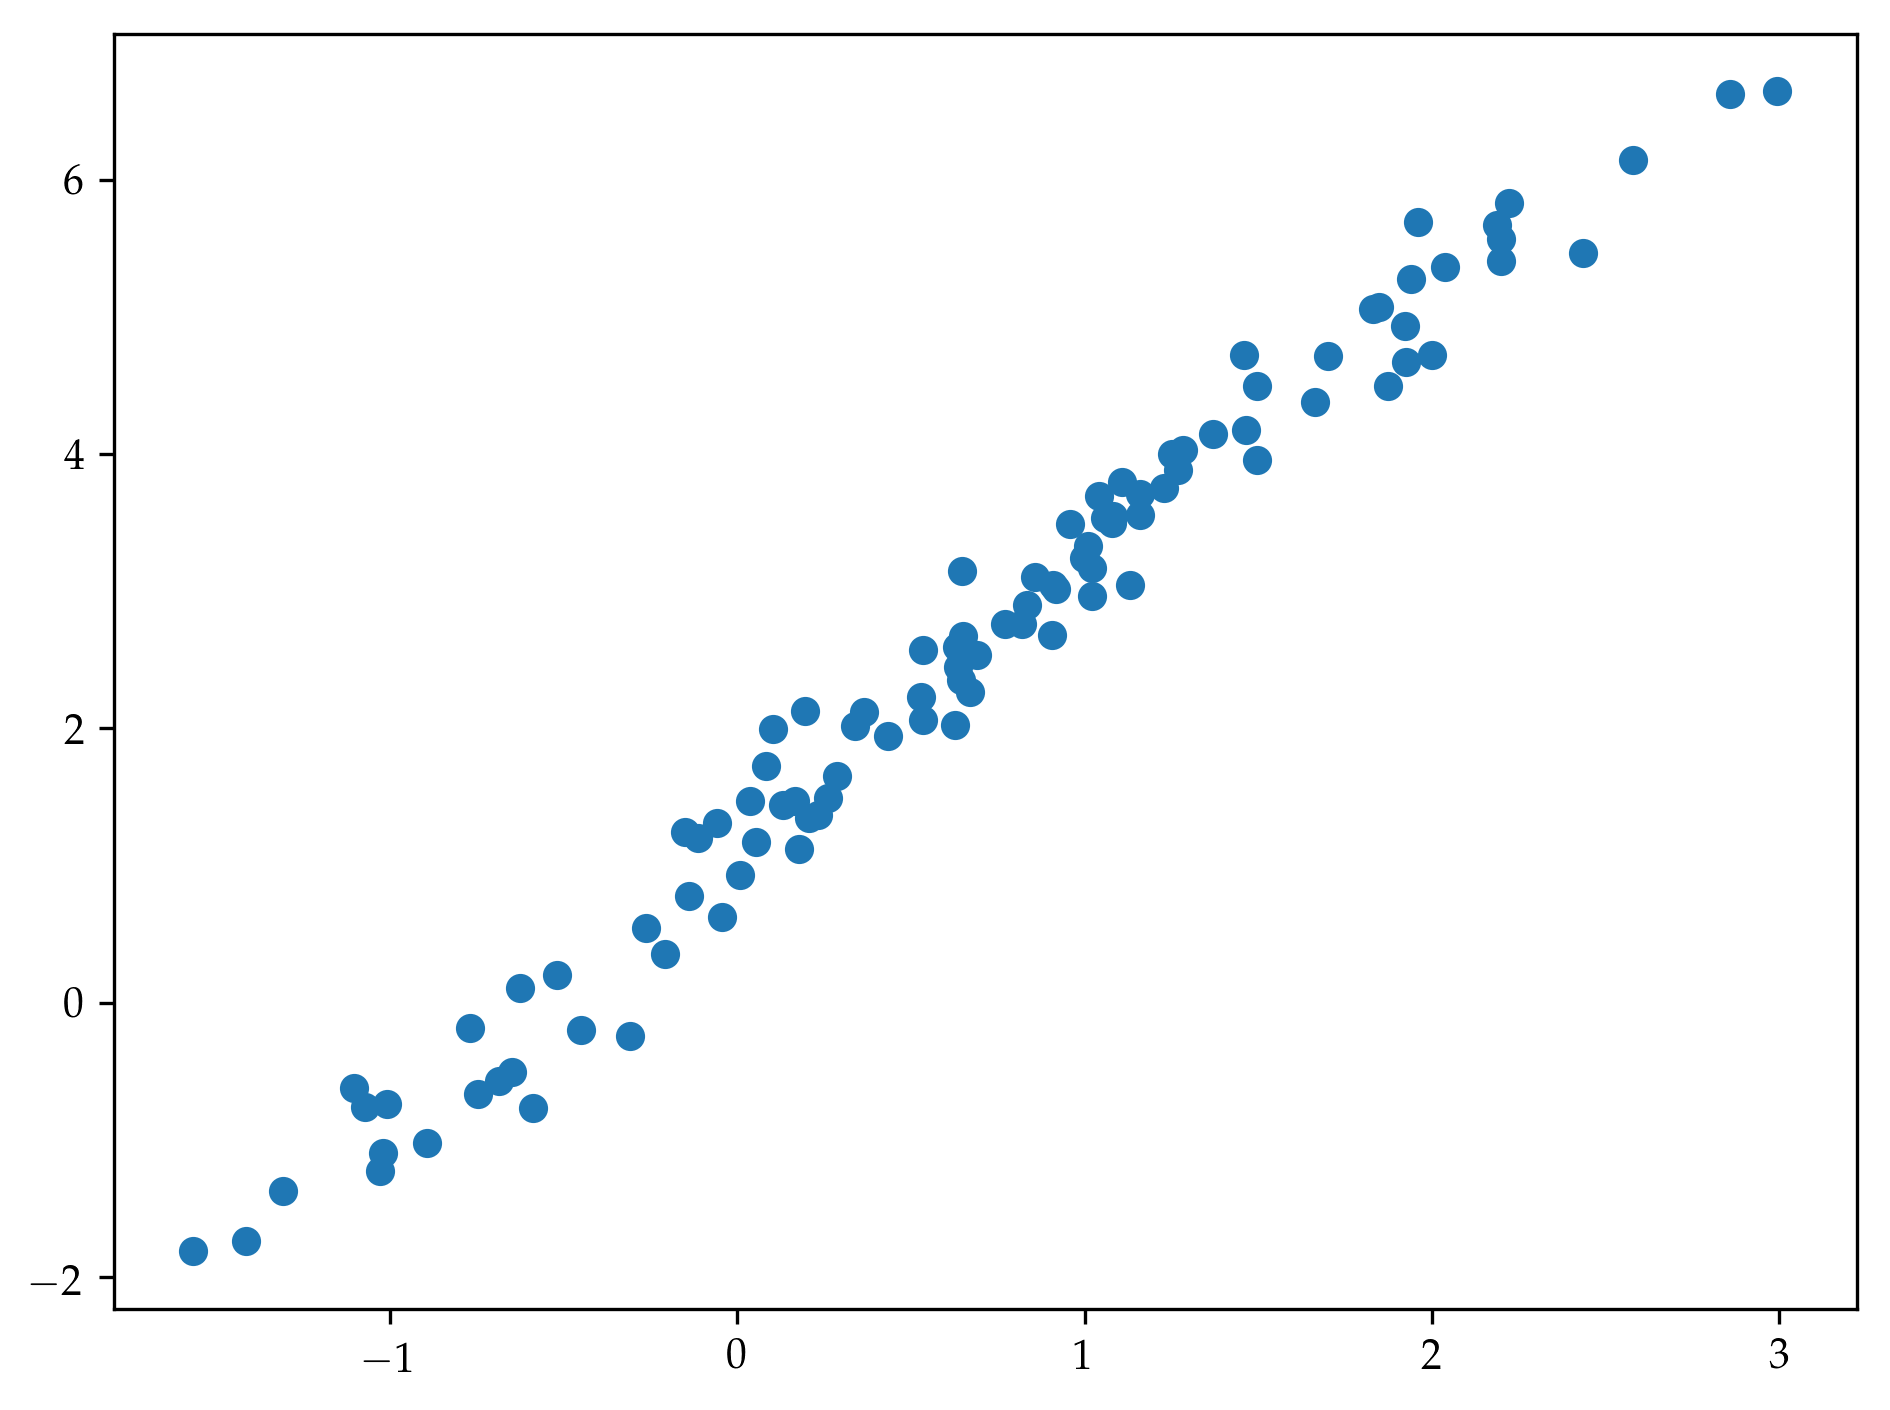

In [79]:
plt.plot(x1, Y, "o")
;

In [90]:
pred_x = xstar -> ([1.0, xstar]' * ((X' * X) \ (X' * Y)))[1]

(::#31) (generic function with 1 method)

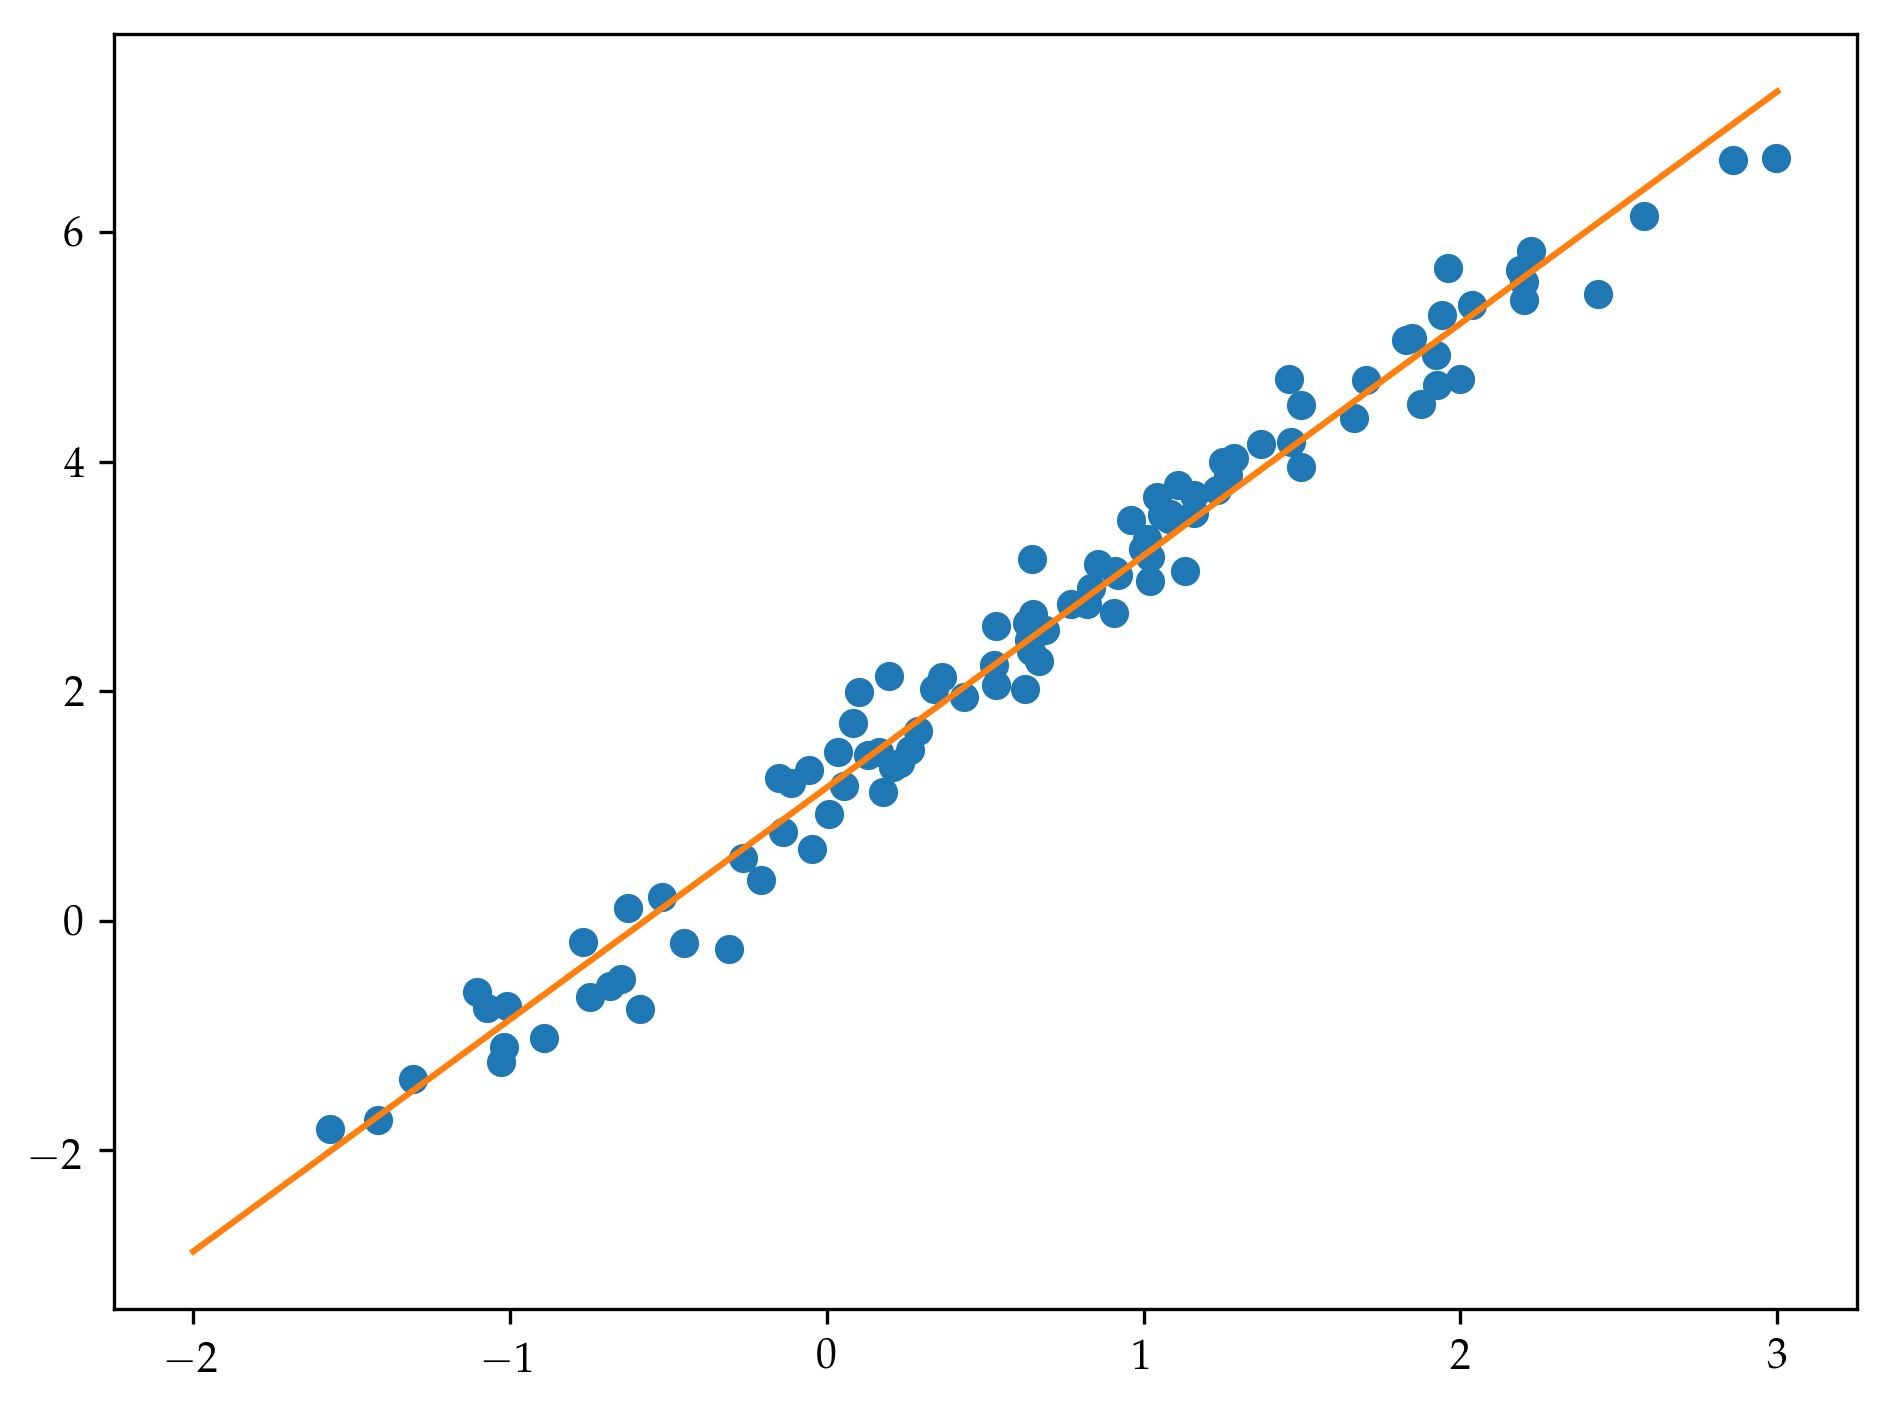

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14963c9e8>

In [91]:
xx = linspace(-2.0, 3.0, 100)
plt.plot(x1, Y, "o")
plt.plot(xx, pred_x.(xx))

In [92]:
wH = xstar -> vec([1.0, xstar]' * ((X' * X) \ X'))

(::#33) (generic function with 1 method)

In [100]:
(X' * X)

2×2 Array{Float64,2}:
 100.0      65.6705
  65.6705  146.18  

In [101]:
sum(x1)

65.67048726331339

In [105]:
sum(x1.^2)

146.17956487241136

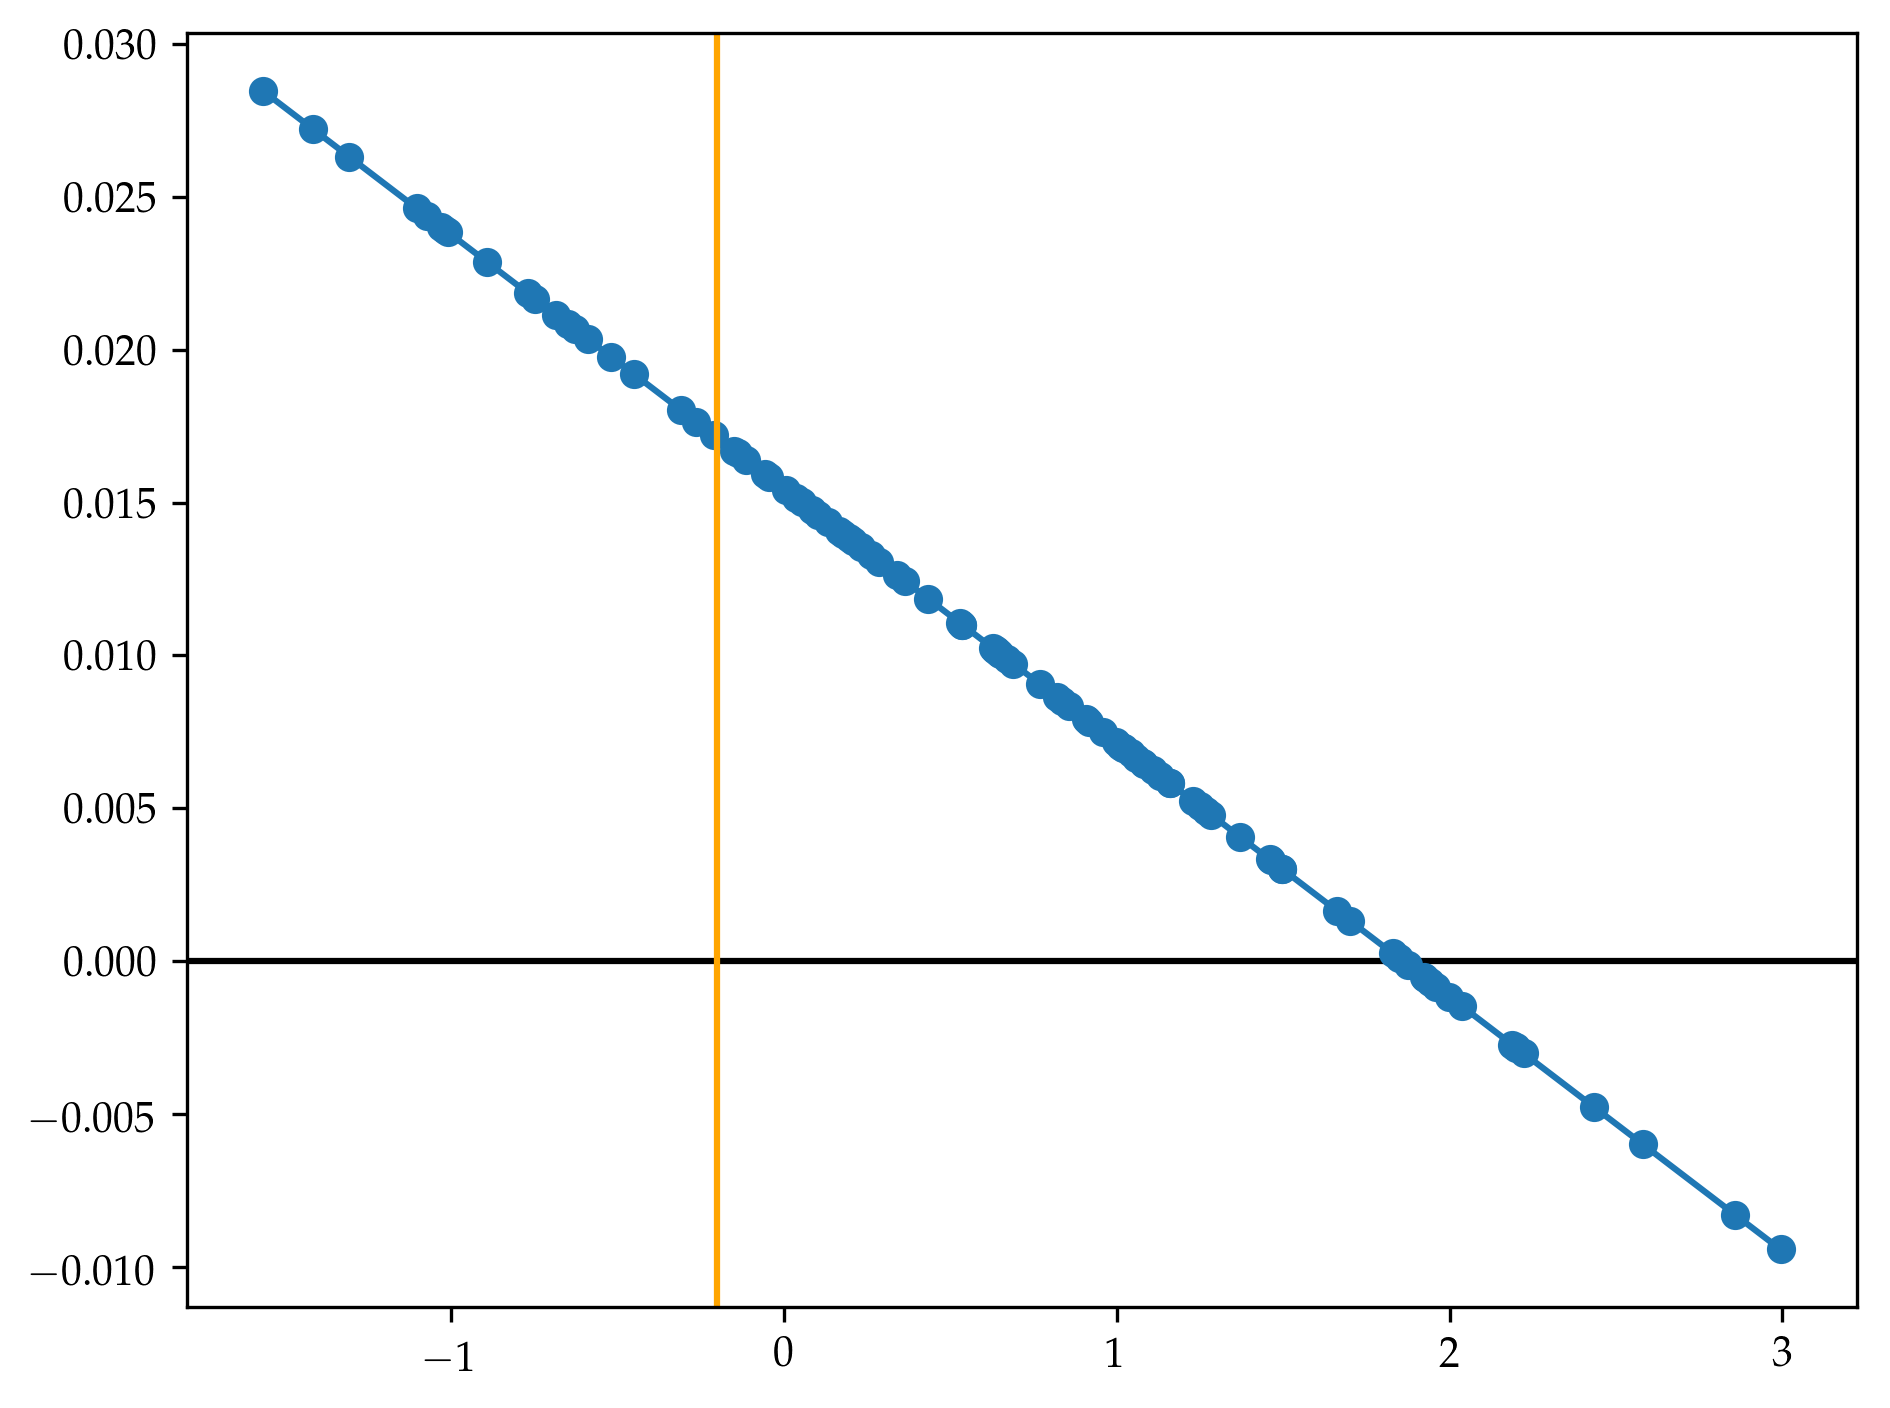

PyObject <matplotlib.lines.Line2D object at 0x1416d49e8>

In [103]:
x = -0.2
plt.axhline(0.0, color="black")
plt.plot(x1, wH(x), "o-")
plt.axvline(x, color="orange")

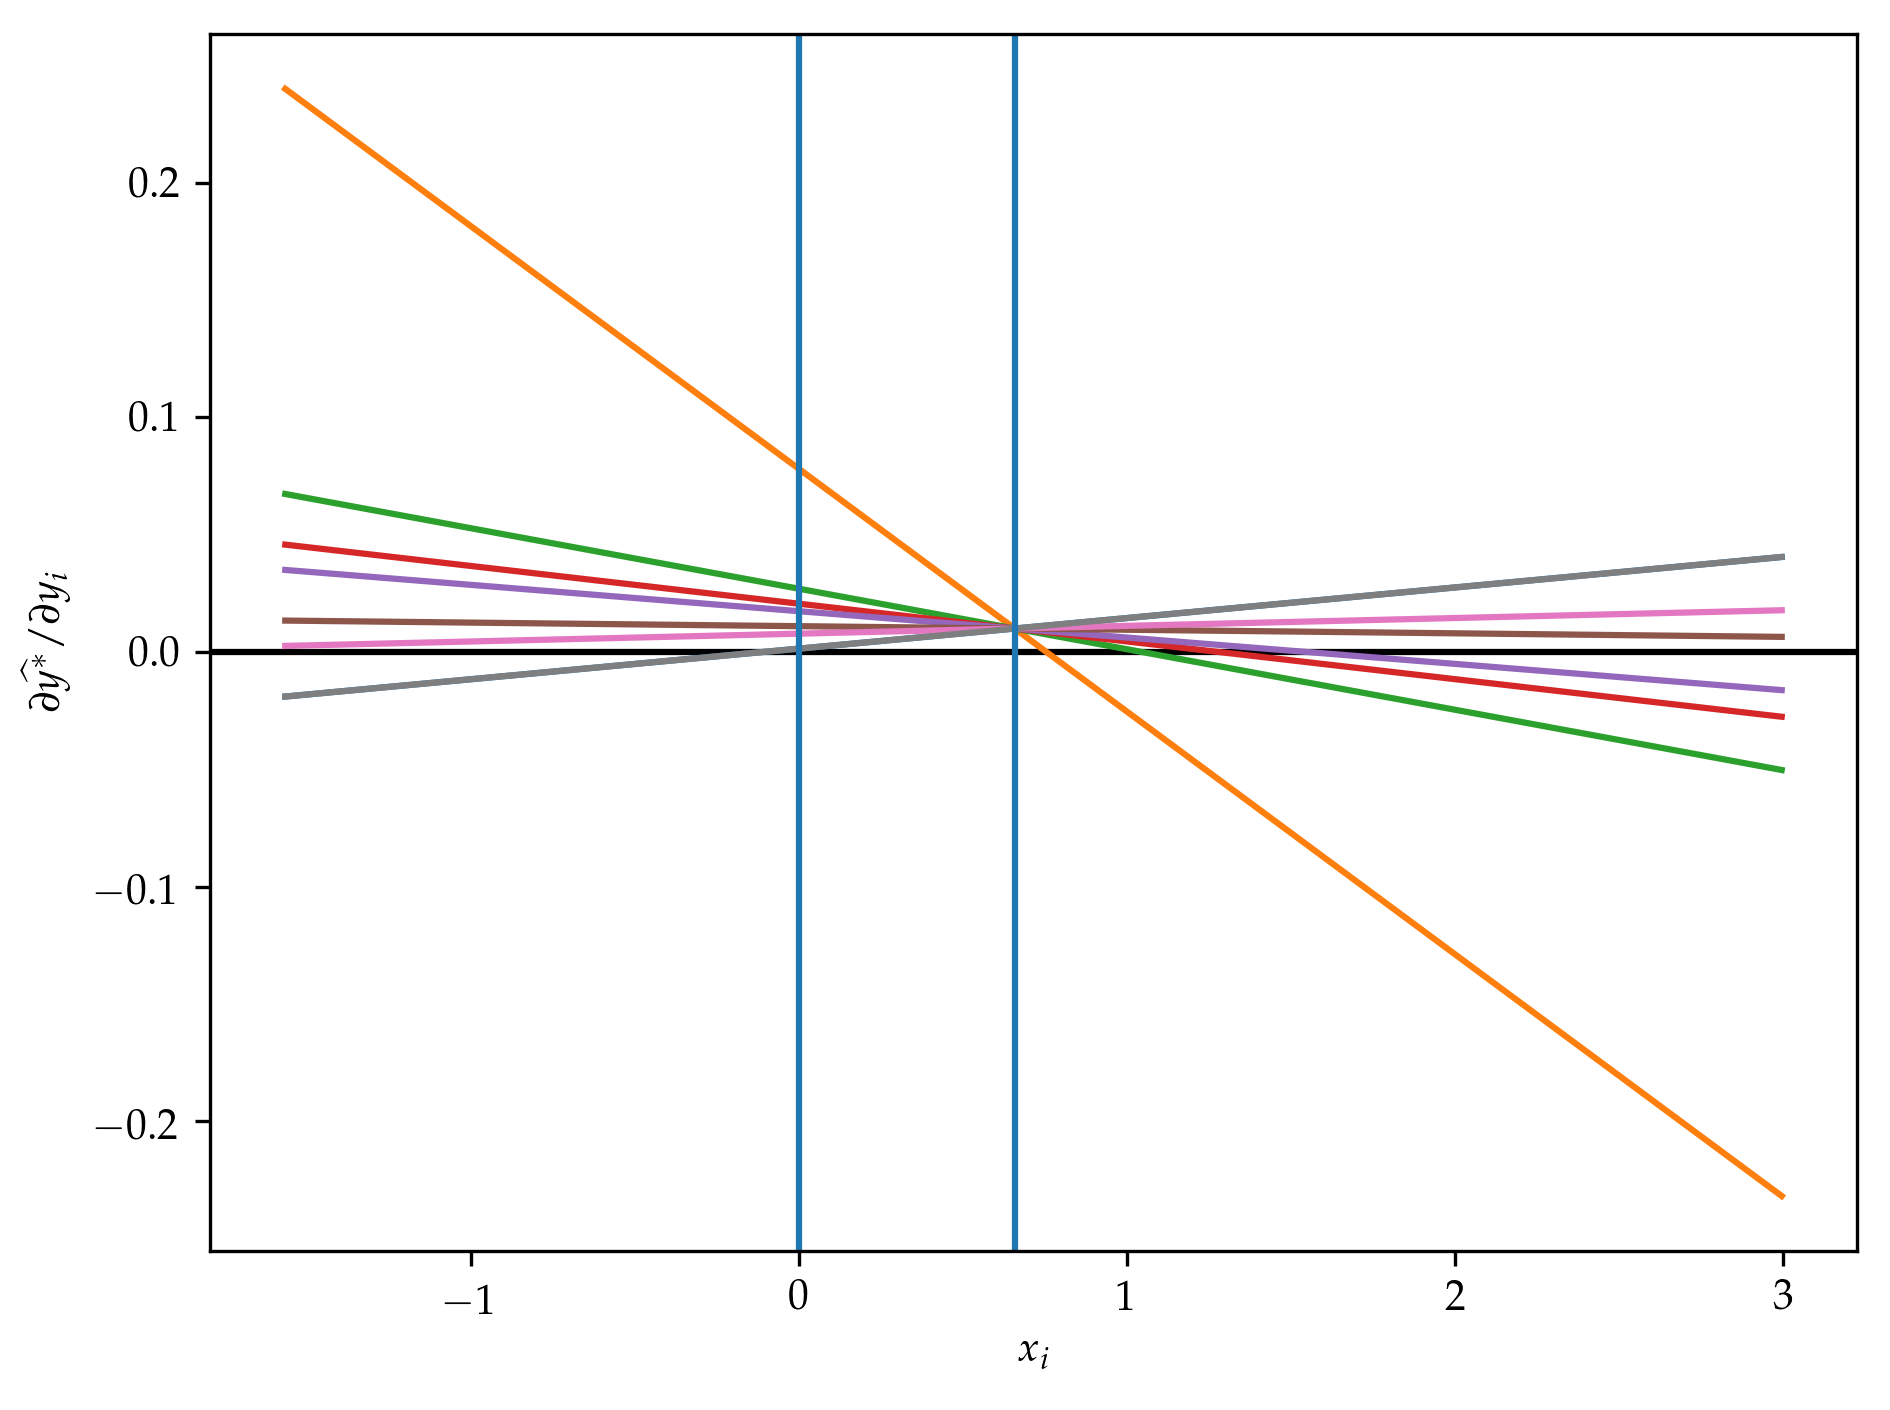

In [122]:
plt.axhline(0.0, color="black")
plt.plot(x1, wH(x), "-")
for x in (-10.0, -2.0, -1.0, -0.5, 0.5, 1.0, 2.0)
    plt.plot(x1, wH(x), "-")
end
plt.axvline(mean(x1))
plt.axvline(0.0)
plt.xlabel(L"x_i")
plt.ylabel(L"\partial \widehat{y^*} / \partial y_i")
# plt.xlim(-0.1, 0.1)
# plt.ylim(-0.01, 0.01)
;

In [110]:
crosspoint = (xstar) -> (xstar*mean(x1) - mean(x1.^2)) / (xstar - mean(x1))

(::#45) (generic function with 1 method)

In [133]:
crosspoint2 = (xstar) -> mean(x1) - var(x1; corrected=false) / (xstar - mean(x1))

(::#55) (generic function with 1 method)

In [136]:
crosspoint(1.0)

-2.3451855616657524

In [134]:
crosspoint2(1.0)

-2.345185561665753

In [137]:
var(x1)

1.0409437969535489

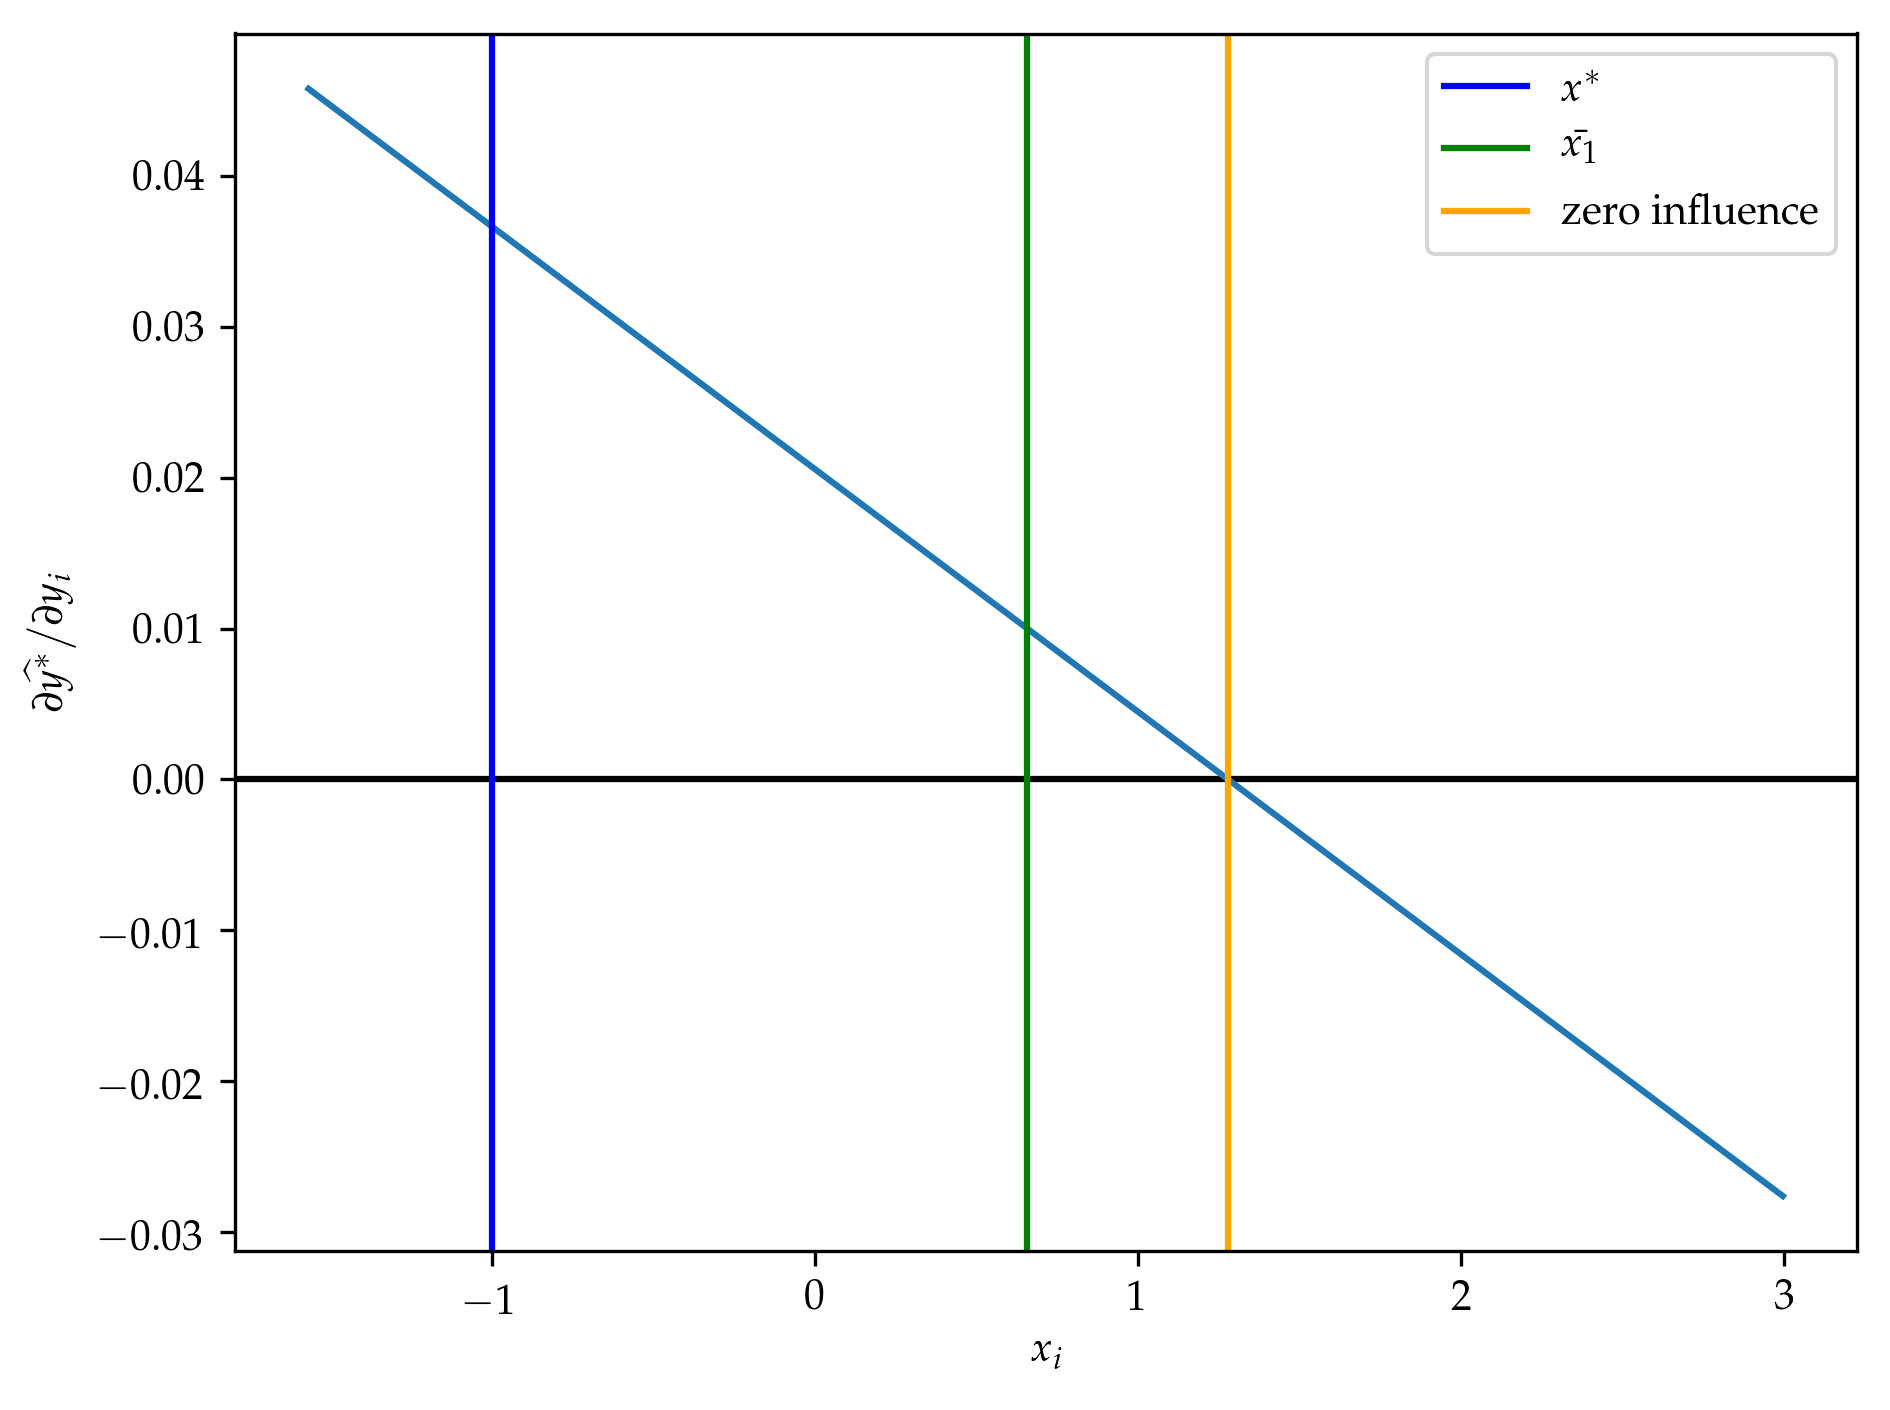

In [142]:
plt.axhline(0.0, color="black")
x = -1.0
plt.plot(x1, wH(x), "-")
plt.axvline(x, color="blue", label=L"$x^*$")
plt.axvline(mean(x1), color="green", label=L"$\bar{x_1}$")
plt.axvline(crosspoint(x), color="orange", label="zero influence")
plt.legend(loc="best")
plt.xlabel(L"x_i")
plt.ylabel(L"\partial \widehat{y^*} \big/ \partial y_i")
;